# Final Project: Classify Waste Products Using Transfer Learning

**Estimated Time Needed**: 60 minutes.

**Table of contents**<a id='toc0_'></a>    
- [**Classify Waste Products Using Transfer Learning**](#toc1_)    
  - [Introduction](#toc1_1_)    
    - [Project Overview](#toc1_1_1_)    
    - [Aim of the Project](#toc1_1_2_)    
  - [Objectives](#toc1_2_)    
    - [Tasks List](#toc1_2_1_)    
    - [Sample Task: Sample screenshot showing code and output](#toc1_2_2_)    
  - [Setup](#toc1_3_)    
    - [Installing Required Libraries](#toc1_3_1_)    
    - [Importing Required Libraries](#toc1_3_2_)    
  - [Task 1: Print the version of tensorflow](#toc1_4_)    
    - [Background](#toc1_5_)    
    - [Create a model for distinguishing recyclable and organic waste images](#toc1_6_)    
    - [Dataset](#toc1_6_1_)    
    - [Importing Data](#toc1_6_2_)    
    - [Define configuration options](#toc1_6_3_)    
    - [Loading Images using ImageGeneratorClass](#toc1_6_4_)    
      - [ImageDataGenerators](#toc1_6_4_1_)    
  - [Task 2: Create a `test_generator` using the `test_datagen` object](#toc1_7_)    
  - [Task 3: Print the length of the `train_generator`](#toc1_8_)    
    - [Pre-trained Models](#toc1_8_1_)    
      - [VGG-16](#toc1_8_1_1_)    
  - [Task 4: Print the summary of the model](#toc1_9_)    
  - [Task 5: Compile the model](#toc1_10_)    
    - [Fit and train the model](#toc1_11_)    
    - [Plot loss curves for training and validation sets (extract_feat_model)](#toc1_11_1_)    
  - [Task 6: Plot accuracy curves for training and validation sets (extract_feat_model)](#toc1_11_2_)    
    - [Fine-Tuning model](#toc1_12_)    
  - [Task 7: Plot loss curves for training and validation sets (fine tune model)](#toc1_12_1_)    
  - [Task 8: Plot accuracy curves for training and validation sets  (fine tune model)](#toc1_12_2_)    
    - [Evaluate both models on test data](#toc1_13_)    
  - [Task 9: Plot a test image using Extract Features Model (index_to_plot = 1)](#toc1_13_1_)    
  - [Task 10: Plot a test image using Fine-Tuned Model (index_to_plot = 1)](#toc1_13_2_)    
  - [Authors](#toc1_14_)    
      

## <a id='toc1_1_'></a>[Introduction](#toc0_)
In this project, you will classify waste products using transfer learning. 

### <a id='toc1_1_1_'></a>[Project Overview](#toc0_)

EcoClean currently lacks an efficient and scalable method to automate the waste sorting process. The manual sorting of waste is not only labor-intensive but also prone to errors, leading to contamination of recyclable materials. The goal of this project is to leverage machine learning and computer vision to automate the classification of waste products, improving efficiency and reducing contamination rates. The project will use transfer learning with a pre-trained VGG16 model to classify images.

### <a id='toc1_1_2_'></a>[Aim of the Project](#toc0_)

The aim of the project is to develop an automated waste classification model that can accurately differentiate between recyclable and organic waste based on images. By the end of this project, you will have trained, fine-tuned, and evaluated a model using transfer learning, which can then be applied to real-world waste management processes.

**Final Output**: A trained model that classifies waste images into recyclable and organic categories.

In [1]:
!pip install tensorflow==2.17.0
!pip install matplotlib==3.9.2
!pip install numpy==1.26.4
!pip install scipy==1.14.1
!pip install scikit-learn==1.5.2

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 1.9 MB/s eta 0:03:21
   ---------------------------------------- 0.1/385.2 MB 1.1 MB/s eta 0:05:39
   ---------------------------------------- 0.2/385.2 MB 1.6 MB/s eta 0:04:04
   ---------------------------------------- 0.3/385.2 MB 1.6 MB/s eta 0:03:57
   ---------------------------------------- 0.4/385.2 MB 2.0 MB/s eta 0:03:17
   ---------------------------------------- 0.5/385.2 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 0.6/385.2 MB 2.2 MB/s eta 0:02:57
   ---------------------------------------- 0.8/385.2 MB 2.2 MB/s eta 0:02:57
   ---------------------------------------- 0.8/385.2 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 1.0/385.2 MB 2.3 MB/s eta 0:02:46
   ---------------------------------------- 1.1/385.2 MB 2.4 MB/s eta 0:02:38


In [21]:
import numpy as np
import os
# import random, shutil
import glob


from matplotlib import pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

# from os import makedirs,listdir
# from shutil import copyfile
# from random import seed
# from random import random

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import InceptionV3
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [22]:
import requests
import zipfile
from tqdm import tqdm

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/kd6057VPpABQ2FqCbgu9YQ/o-vs-r-split-reduced-1200.zip"
file_name = "o-vs-r-split-reduced-1200.zip"

print("Downloading file")
with requests.get(url, stream=True) as response:
    response.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)


def extract_file_with_progress(file_name):
    print("Extracting file with progress")
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        members = zip_ref.infolist() 
        with tqdm(total=len(members), unit='file') as progress_bar:
            for member in members:
                zip_ref.extract(member)
                progress_bar.update(1)
    print("Finished extracting file")


extract_file_with_progress(file_name)

print("Finished extracting file")
os.remove(file_name)

Extracting file with progress


100%|██████████| 1207/1207 [00:02<00:00, 495.11file/s]

Finished extracting file
Finished extracting file


In [23]:
img_rows, img_cols = 150, 150
batch_size = 32
n_epochs = 10
n_classes = 2
val_split = 0.2
verbosity = 1
path = 'o-vs-r-split/train/'
path_test = 'o-vs-r-split/test/'
input_shape = (img_rows, img_cols, 3)
labels = ['O', 'R']
seed = 42

### <a id='toc1_6_4_'></a>[Loading Images using ImageGeneratorClass](#toc0_)

Transfer learning works best when models are trained on smaller datasets. 

The folder structure looks as follows:

```python
o-vs-r-split/
└── train
    ├── O
    └── R
└── test
    ├── O
    └── R
```


#### <a id='toc1_6_4_1_'></a>[ImageDataGenerators](#toc0_)


Now you will create ImageDataGenerators used for training, validation and testing.

Image data generators create batches of tensor image data with real-time data augmentation. The generators loop over the data in batches and are useful in feeding data to the training process. 

In [24]:
# Create ImageDataGenerators for training and validation and testing
train_datagen = ImageDataGenerator(
    validation_split = val_split,
    rescale=1.0/255.0,
	width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    validation_split = val_split,
    rescale=1.0/255.0,
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator = train_datagen.flow_from_directory(
    directory = path,
    seed = seed,
    batch_size = batch_size, 
    class_mode='binary',
    shuffle = True,
    target_size=(img_rows, img_cols),
    subset = 'training'
)

val_generator = val_datagen.flow_from_directory(
    directory = path,
    seed = seed,
    batch_size = batch_size, 
    class_mode='binary',
    shuffle = True,
    target_size=(img_rows, img_cols),
    subset = 'validation'
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Tasks List
To achieve the above objectives, you will complete the following tasks:

- Task 1: Print the version of TensorFlow
- Task 2: Create a test generator using the test_datagen object
- Task 3: Print the length of the train generator
- Task 4: Print the summary of the model
- Task 5: Compile the model
- Task 6: Plot accuracy curves for training and validation sets
- Task 7: Plot loss curves for training and validation sets (fine-tuned model)
- Task 8: Plot accuracy curves for training and validation sets (fine-tuned model)
- Task 9: Plot a test image using the Extract Features Model
- Task 10: Plot a test image using the Fine-Tuned Model

In [7]:
# Task 1: Print the version of TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


Found 200 images belonging to 2 classes.


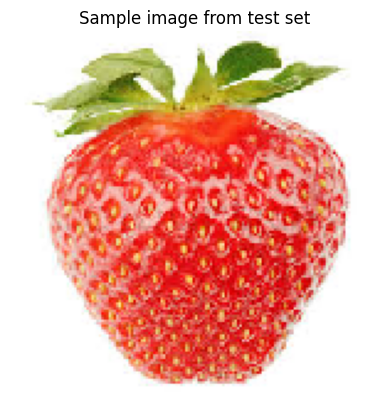

In [25]:
# Task 2: Create a test generator using the test_datagen object
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    directory=path_test,  # Ensure this points to the correct test image directory
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='binary',
    seed=seed,
    shuffle=False
)

# Validate that images are loaded correctly
test_imgs, test_labels = next(test_generator)
plt.imshow(test_imgs[0])
plt.title("Sample image from test set")
plt.axis('off')
plt.show()

In [26]:
# Task 3: Print the length of the train generator
print(f"Number of training batches: {len(train_generator)}")

Number of training batches: 25


Labels: ['O', 'O', 'O', 'O', 'O']


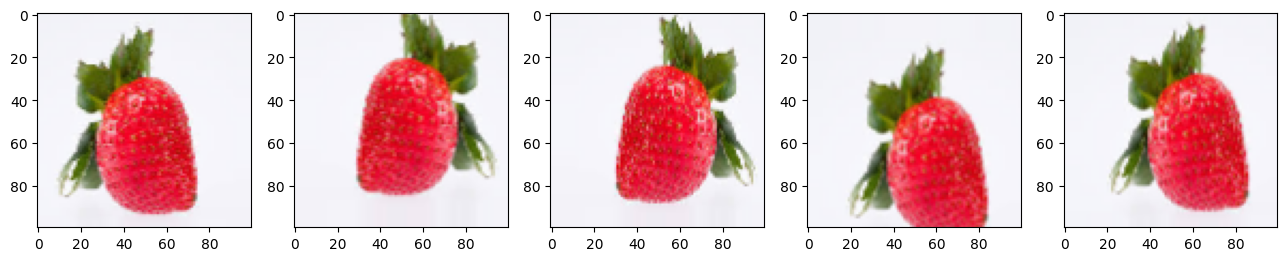

In [27]:
# Let's look at a few augmented images:
from pathlib import Path

IMG_DIM = (100, 100)

train_files = glob.glob('./o-vs-r-split/train/O/*')
train_files = train_files[:20]
train_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [Path(fn).parent.name for fn in train_files]

img_id = 0
O_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
O = [next(O_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in O])
l = [ax[i].imshow(O[i][0][0]) for i in range(0,5)]

In [28]:
# Task 4: Print the summary of the model
from tensorflow.keras.applications import vgg16

input_shape = (150, 150, 3)
vgg = vgg16.VGG16(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape)

output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
basemodel = Model(vgg.input, output)

for layer in basemodel.layers: 
    layer.trainable = False

input_shape = basemodel.output_shape[1]

model = Sequential()
model.add(basemodel)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_12 (Functional)      │ (None, 8192)           │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [29]:
# Task 5: Compile the model
for layer in basemodel.layers: 
    layer.trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [30]:
# You will use early stopping to avoid over-training the model.
from tensorflow.keras.callbacks import LearningRateScheduler

checkpoint_path='O_R_tlearn_vgg16.keras'

# define step decay function
class LossHistory_(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(epoch))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 1e-4
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)

keras_callbacks = [
      EarlyStopping(monitor = 'val_loss', 
                    patience = 4, 
                    mode = 'min', 
                    min_delta=0.01),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

callbacks_list_ = [loss_history_, lrate_] + keras_callbacks

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4915 - loss: 0.7289lr: 9.048374180359596e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 10s/step - accuracy: 0.5023 - loss: 0.7227 - val_accuracy: 0.7344 - val_loss: 0.5701 - learning_rate: 1.0000e-04
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7431 - loss: 0.5617lr: 8.187307530779819e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7411 - loss: 0.5615 - val_accuracy: 0.5000 - val_loss: 0.7258 - learning_rate: 9.0484e-05
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6871 - loss: 0.5781lr: 7.408182206817179e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.6903 - loss: 0.5750 - val_accuracy: 0.8177 - val_loss: 0.4667 - learning_rate: 8.1873e-05
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7075 - loss: 0.5056lr: 6.703200460356394e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7104 - loss: 0.5040 - val_accuracy: 0.8750 - val_loss: 0.3826 - learning_rate: 7.4082e-05
Epoch 5/10


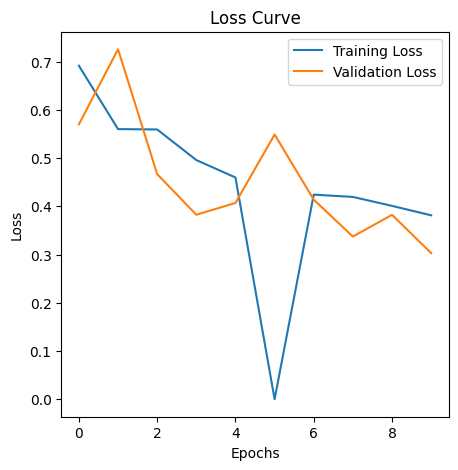

In [31]:
extract_feat_model = model.fit(train_generator, 
                               steps_per_epoch=5, 
                               epochs=10,
                               callbacks = callbacks_list_,   
                               validation_data=val_generator, 
                               validation_steps=val_generator.samples // batch_size, 
                               verbose=1)

import matplotlib.pyplot as plt

history = extract_feat_model

# plot loss curve
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

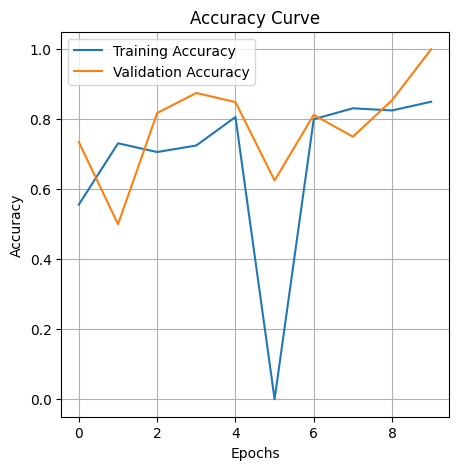

In [32]:
# Task 6: Plot accuracy curves for training and validation sets
history = extract_feat_model

plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Fine-tuning is an optional step in transfer learning, it usually ends up improving the performance of the model. 

You will **unfreeze** one layer from the base model and train the model again.

In [33]:
from tensorflow.keras.applications import vgg16

input_shape = (150, 150, 3)
vgg = vgg16.VGG16(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape)

output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
basemodel = Model(vgg.input, output)

for layer in basemodel.layers: 
    layer.trainable = False

display([layer.name for layer in basemodel.layers])

set_trainable = False

for layer in basemodel.layers:
    if layer.name in ['block5_conv3']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in basemodel.layers:
    print(f"{layer.name}: {layer.trainable}")

['input_layer_6',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool',
 'flatten_3']

input_layer_6: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: False
block5_conv2: False
block5_conv3: True
block5_pool: True
flatten_3: True


In [34]:
model = Sequential()
model.add(basemodel)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

checkpoint_path='O_R_tlearn_fine_tune_vgg16.keras'

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)

keras_callbacks = [
      EarlyStopping(monitor = 'val_loss', 
                    patience = 4, 
                    mode = 'min', 
                    min_delta=0.01),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

callbacks_list_ = [loss_history_, lrate_] + keras_callbacks

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

fine_tune_model = model.fit(train_generator, 
                    steps_per_epoch=5, 
                    epochs=10,
                    callbacks = callbacks_list_,   
                    validation_data=val_generator, 
                    validation_steps=val_generator.samples // batch_size, 
                    verbose=1)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5697 - loss: 0.7943lr: 9.048374180359596e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.5758 - loss: 0.7798 - val_accuracy: 0.5625 - val_loss: 0.6405 - learning_rate: 1.0000e-04
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7195 - loss: 0.5591lr: 8.187307530779819e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.7256 - loss: 0.5564 - val_accuracy: 0.6250 - val_loss: 0.6341 - learning_rate: 9.0484e-05
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8036 - loss: 0.4568lr: 7.408182206817179e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 10s/step - accuracy: 0.7999 - loss: 0.4588 - val_accuracy: 0.8542 - val_loss: 0.3633 - learning_rate: 8.1873e-05
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7697 - loss: 0.5009lr: 6.703200460356394e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.7737 - loss: 0.4988 - val_accuracy: 0.8750 - val_loss: 0.3016 - learning_rate: 7.4082e-05
Epoch 5/10

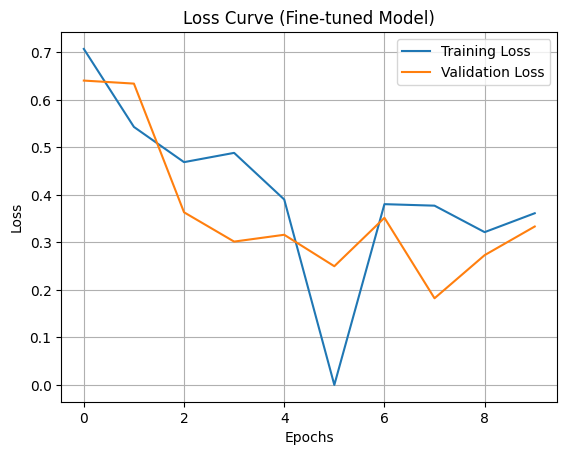

In [35]:
# Task 7: Plot loss curves for training and validation sets (fine-tuned model)
from tensorflow.keras import optimizers

history = fine_tune_model

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve (Fine-tuned Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

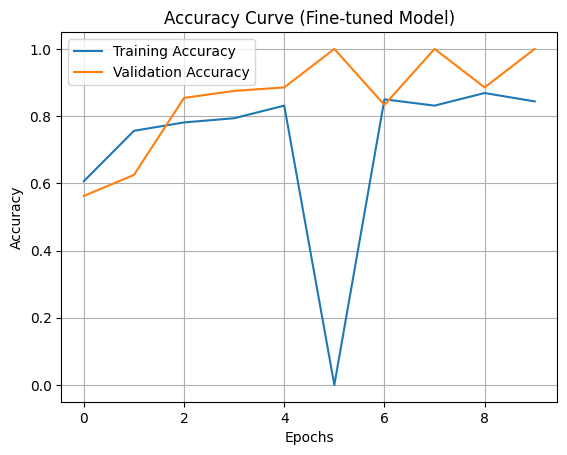

In [36]:
# Task 8: Plot accuracy curves for training and validation sets (fine-tuned model)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve (Fine-tuned Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
from pathlib import Path

# Load saved models
extract_feat_model = tf.keras.models.load_model('O_R_tlearn_vgg16.keras')
fine_tune_model = tf.keras.models.load_model('O_R_tlearn_fine_tune_vgg16.keras')

IMG_DIM = (150, 150)

# Load test images
test_files_O = glob.glob('./o-vs-r-split/test/O/*')
test_files_R = glob.glob('./o-vs-r-split/test/R/*')
test_files = test_files_O[:50] + test_files_R[:50]

test_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [Path(fn).parent.name for fn in test_files]

# Standardize
test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

class2num_lt = lambda l: [0 if x == 'O' else 1 for x in l]
num2class_lt = lambda l: ['O' if x < 0.5 else 'R' for x in l]

test_labels_enc = class2num_lt(test_labels)

# Make predictions for both models
predictions_extract_feat_model = extract_feat_model.predict(test_imgs_scaled, verbose=0)
predictions_fine_tune_model = fine_tune_model.predict(test_imgs_scaled, verbose=0)

# Convert predictions to class labels
predictions_extract_feat_model = num2class_lt(predictions_extract_feat_model)
predictions_fine_tune_model = num2class_lt(predictions_fine_tune_model)

# Print classification report for both models
print('Extract Features Model')
print(metrics.classification_report(test_labels, predictions_extract_feat_model))
print('Fine-Tuned Model')
print(metrics.classification_report(test_labels, predictions_fine_tune_model))

Extract Features Model
              precision    recall  f1-score   support

           O       0.72      0.72      0.72        50
           R       0.72      0.72      0.72        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

Fine-Tuned Model
              precision    recall  f1-score   support

           O       0.75      0.94      0.83        50
           R       0.92      0.68      0.78        50

    accuracy                           0.81       100
   macro avg       0.83      0.81      0.81       100
weighted avg       0.83      0.81      0.81       100



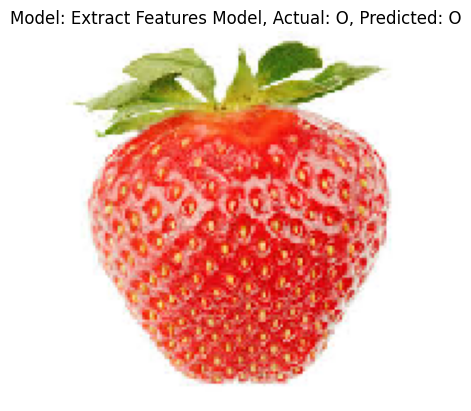

In [38]:
# Plot one of the images with actual label and predicted label as title
def plot_image_with_title(image, model_name, actual_label, predicted_label):
    plt.imshow(image)
    plt.title(f"Model: {model_name}, Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Specify index of image to plot, for example index 0
index_to_plot = 0
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),
    model_name='Extract Features Model',
    actual_label=test_labels[index_to_plot], 
    predicted_label=predictions_extract_feat_model[index_to_plot],
    )

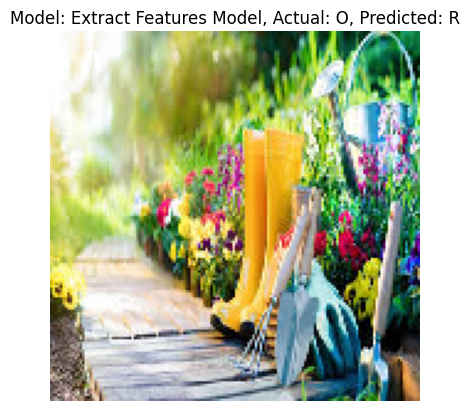

In [39]:
# Task 9: Plot a test image using the Extract Features Model
index_to_plot = 1
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),
    model_name='Extract Features Model',
    actual_label=test_labels[index_to_plot], 
    predicted_label=predictions_extract_feat_model[index_to_plot],
    )

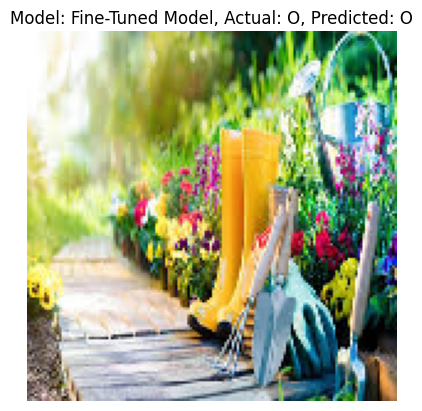

In [40]:
# Task 10: Plot a test image using the Fine-Tuned Model
index_to_plot = 1
plot_image_with_title(
    image=test_imgs[index_to_plot].astype('uint8'),
    model_name='Fine-Tuned Model',
    actual_label=test_labels[index_to_plot], 
    predicted_label=predictions_fine_tune_model[index_to_plot],
    )